In [1]:
import cv2
import dlib
import numpy as np
import math

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [17]:
image = cv2.imread('test_hreso/test_hreso/happy/images (2).jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    center = np.mean(shape,axis=0,dtype="int") #
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        cv2.line(image,center,(x,y),(0,255,0),1) # Draw the line 
    #Display the image
cv2.imshow('Landmark Detection', image)
cv2.waitKey()
cv2.imwrite('ImageP/LandmarkF.png',image)

True

In [147]:
image = cv2.imread('FER2013/train/happy/Training_10070997.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    center = np.mean(shape,axis=0,dtype="int") #
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        cv2.line(image,center,(x,y),(0,255,0),1) # Draw the line 
    #Display the image
cv2.imshow('Landmark Detection', image)
cv2.waitKey()

-1

In [146]:
shape

array([[ 9, 18],
       [ 8, 22],
       [ 7, 26],
       [ 7, 31],
       [ 9, 35],
       [12, 39],
       [14, 43],
       [16, 46],
       [19, 48],
       [23, 48],
       [28, 47],
       [34, 45],
       [40, 42],
       [45, 38],
       [47, 32],
       [48, 27],
       [49, 21],
       [ 9, 13],
       [10, 11],
       [12, 10],
       [14, 11],
       [17, 12],
       [22, 12],
       [26, 12],
       [30, 12],
       [33, 13],
       [36, 15],
       [19, 18],
       [18, 20],
       [17, 22],
       [16, 24],
       [15, 27],
       [16, 28],
       [17, 28],
       [19, 28],
       [21, 28],
       [11, 18],
       [13, 17],
       [15, 17],
       [17, 19],
       [15, 19],
       [13, 18],
       [25, 19],
       [27, 18],
       [30, 19],
       [32, 20],
       [30, 21],
       [27, 20],
       [14, 34],
       [14, 32],
       [16, 31],
       [17, 32],
       [19, 32],
       [23, 34],
       [28, 36],
       [23, 41],
       [19, 43],
       [17, 42],
       [16, 41

In [7]:
shape

array([[-2, 26],
       [ 0, 31],
       [ 2, 37],
       [ 4, 42],
       [ 8, 45],
       [14, 47],
       [20, 48],
       [27, 48],
       [32, 48],
       [35, 46],
       [37, 42],
       [38, 38],
       [39, 33],
       [40, 29],
       [40, 24],
       [39, 20],
       [37, 17],
       [ 6, 18],
       [ 9, 15],
       [13, 14],
       [17, 13],
       [21, 14],
       [29, 12],
       [31, 10],
       [33,  8],
       [36,  9],
       [37, 10],
       [26, 18],
       [28, 21],
       [29, 23],
       [31, 26],
       [25, 30],
       [28, 30],
       [30, 30],
       [32, 29],
       [33, 28],
       [11, 21],
       [14, 19],
       [17, 18],
       [19, 21],
       [17, 22],
       [14, 22],
       [29, 18],
       [31, 15],
       [34, 14],
       [35, 15],
       [34, 17],
       [32, 18],
       [19, 37],
       [24, 34],
       [28, 33],
       [30, 33],
       [32, 32],
       [34, 32],
       [35, 33],
       [35, 36],
       [33, 39],
       [31, 40],
       [28, 40

In [15]:
center = np.mean(shape_np,axis=0)
print(center)

[363.20588235 324.05882353]


In [34]:
point1_x, point1_y = shape_np[0]-center

In [21]:
magnitude1 = np.linalg.norm(shape_np[0] - center)

In [35]:
direction1 = np.arctan2(point1_y,point1_x)

In [36]:
direction1

-2.6709198976009185

Extract features

In [3]:
def getfeature (landmark):
    feature = np.zeros([68,4])
    # Find the center of all landmark points
    center = np.mean(landmark,axis=0)
    # for each landmark point get the relative position, magnitude and direction
    for i in range(0,68):
        # Relative position to center
        # Question: Use relative or absolute? Because relative can be calculated by magnitude and direction
        point_x, point_y = landmark[i] - center
        # Magnitude: Euclidean distance
        magnitude = np.linalg.norm(landmark[i]-center)
        # Angle between the line and horizontal axis
        direction = np.arctan2(point_y,point_x)
        feature[i] = [point_x,point_y,magnitude,direction]
    return feature

In [4]:
features = getfeature(shape_np)

NameError: name 'shape_np' is not defined

In [53]:
features

array([[-1.65205882e+02, -8.40588235e+01,  1.85361456e+02,
        -2.67091990e+00],
       [-1.57205882e+02, -4.40588235e+01,  1.63263191e+02,
        -2.86834108e+00],
       [-1.44205882e+02, -3.05882353e+00,  1.44238320e+02,
        -3.12038433e+00],
       [-1.32205882e+02,  3.49411765e+01,  1.36745315e+02,
         2.88320703e+00],
       [-1.16205882e+02,  7.09411765e+01,  1.36148660e+02,
         2.59350408e+00],
       [-9.12058824e+01,  1.03941176e+02,  1.38283336e+02,
         2.29102691e+00],
       [-6.02058824e+01,  1.31941176e+02,  1.45028350e+02,
         1.99888402e+00],
       [-2.42058824e+01,  1.52941176e+02,  1.54844852e+02,
         1.72776357e+00],
       [ 1.67941176e+01,  1.54941176e+02,  1.55848678e+02,
         1.46282755e+00],
       [ 5.67941176e+01,  1.45941176e+02,  1.56602678e+02,
         1.19967165e+00],
       [ 8.97941176e+01,  1.16941176e+02,  1.47438877e+02,
         9.15964258e-01],
       [ 1.14794118e+02,  8.19411765e+01,  1.41039164e+02,
      

In [54]:
# Flatten it to 272 elements vector
feature_vector = features.ravel()

### Gain Training set 

In [60]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('FER2013')

In [83]:
import os
path = 'FER2013/train/'
files = os.listdir(path)  
num = len(files)  

In [84]:
def getfeature (landmark):
    feature = np.zeros([68,4])
    # Find the center of all landmark points
    center = np.mean(landmark,axis=0)
    # for each landmark point get the relative position, magnitude and direction
    for i in range(0,68):
        # Relative position to center
        # Question: Use relative or absolute? Because relative can be calculated by magnitude and direction
        point_x, point_y = landmark[i] - center
        # Magnitude: Euclidean distance
        magnitude = np.linalg.norm(landmark[i]-center)
        # Angle between the line and horizontal axis
        direction = np.arctan2(point_y,point_x)
        feature[i] = [point_x,point_y,magnitude,direction]
    feature = feature.ravel()
    return feature

In [5]:
'''
def getfeaturevector (path):
    global shape_p
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
    rects = detector(gray, 1)
    # Detect landmarks for each face
    for rect in rects:
        # Get the landmark points
        shape = predictor(gray, rect)
        print(1)
        # Convert it to the NumPy Array
        shape_np = np.zeros((68, 2), dtype="int")
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)
        shape_p = shape_np
    features = getfeature(shape_p)
    # Flatten it to 272 elements vector
    feature_vector = features.ravel()
    return feature_vector
    '''

'\ndef getfeaturevector (path):\n    global shape_p\n    image = cv2.imread(path)\n    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    # Detect the face\n    rects = detector(gray, 1)\n    # Detect landmarks for each face\n    for rect in rects:\n        # Get the landmark points\n        shape = predictor(gray, rect)\n        print(1)\n        # Convert it to the NumPy Array\n        shape_np = np.zeros((68, 2), dtype="int")\n        for i in range(0, 68):\n            shape_np[i] = (shape.part(i).x, shape.part(i).y)\n        shape_p = shape_np\n    features = getfeature(shape_p)\n    # Flatten it to 272 elements vector\n    feature_vector = features.ravel()\n    return feature_vector\n    '

In [85]:
def getfeaturevector (path):
    global shape_np
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
    rects = detector(gray, 1)
    # Detect landmarks for each face
    for rect in rects:
        # Get the landmark points
        shape = predictor(gray, rect)
	# Convert it to the NumPy Array
        shape_np = np.zeros((68, 2), dtype="int")
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)
    return shape_np
'''
    features = getfeature(shape)
    # Flatten it to 272 elements vector
    feature_vector = features.ravel()
    return feature_vector
    '''

'\n    features = getfeature(shape)\n    # Flatten it to 272 elements vector\n    feature_vector = features.ravel()\n    return feature_vector\n    '

In [86]:
num_catrgories = np.zeros(num)

In [87]:
labels = []

In [88]:
icategory = 0
# Gain name of categories and number of instances in each class
for file in os.listdir(path):
    # Get folders of each categories
    subfolder = os.path.join(path, file)
    files = os.listdir(subfolder)  
    num_catrgories[icategory] = len(files)
    labels.append(file)
    icategory += 1

In [89]:
num_catrgories = num_catrgories.astype(int)
print(num_catrgories)

[3995  436 4097 7215 4965 4830 3171]


In [90]:
labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [92]:
train_size= np.sum(num_catrgories).astype(int)

In [93]:
X_train = np.zeros([train_size,272]) # 68*4 =272

In [102]:
Train_i = 0
for file in os.listdir(path):
    subfolder = os.path.join(path, file)
    for fileI in os.listdir(subfolder):
        train_img = os.path.join(subfolder,fileI)
        X_train[Train_i] = getfeaturevector(train_img)
        Train_i += 1

In [107]:
from numpy import savetxt
savetxt('X_train.csv',X_train,delimiter=',')

In [94]:
Y_train = []
classnum = 0
for label in labels:
    for num_instances in range(0,num_catrgories[classnum]):
        Y_train.append(label)
    classnum += 1

In [95]:
len(Y_train)

28709

In [96]:
# load numpy array from csv file
from numpy import loadtxt
# load array
X_train = loadtxt('X_train.csv', delimiter=',')
# print the array

In [97]:
X_train.shape

(28709, 272)

### Get testing set

In [98]:
import os
path = 'FER2013/test/'
files = os.listdir(path)  
num = len(files)  

In [99]:
num_catrgories = np.zeros(num)
labels = []

In [100]:
icategory = 0
# Gain name of categories and number of instances in each class
for file in os.listdir(path):
    # Get folders of each categories
    subfolder = os.path.join(path, file)
    files = os.listdir(subfolder)  
    num_catrgories[icategory] = len(files)
    labels.append(file)
    icategory += 1
num_catrgories = num_catrgories.astype(int)

In [17]:
test_size= np.sum(num_catrgories).astype(int)

In [41]:
X_test = np.zeros([test_size,272])

In [87]:
Test_i = 0
for file in os.listdir(path):
    subfolder = os.path.join(path, file)
    for fileI in os.listdir(subfolder):
        test_img = os.path.join(subfolder,fileI)
        img_landmark = getfeaturevector(test_img)
        X_test[Test_i] = getfeature(img_landmark)
        Test_i += 1

In [93]:
from numpy import savetxt
savetxt('X_test.csv',X_test,delimiter=',')

In [101]:
# load numpy array from csv file
from numpy import loadtxt
# load array
X_test = loadtxt('X_test.csv', delimiter=',')
# print the array

In [102]:
Y_test = []
classnum = 0
for label in labels:
    for num_instances in range(0,num_catrgories[classnum]):
        Y_test.append(label)
    classnum += 1

In [103]:
len(Y_test)

7178

Use SVC

### SVC1: RBF kernel 

In [139]:
from sklearn import svm
from sklearn import metrics

In [140]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [19]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

SVC()

In [20]:
clf.score(X_train,Y_train)

0.5048939356996064

In [95]:
y_pred = clf.predict(X_test)

In [96]:


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.49526330454165507


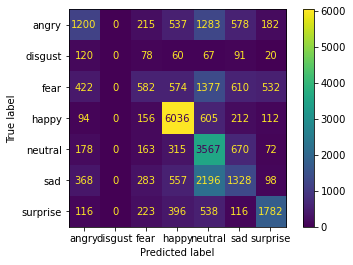

In [99]:

plot_confusion_matrix(clf, X_train,Y_train)  
plt.show()

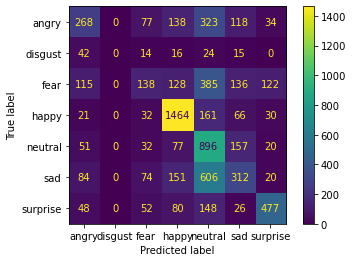

In [100]:
plot_confusion_matrix(clf, X_test,Y_test)  
plt.show()

### SVC2: Poly Kernel

In [141]:
#Create a svm Classifier
clfsP = svm.SVC(kernel='poly') 

#Train the model using the training sets
clfsP.fit(X_train, Y_train)

SVC(kernel='poly')

In [22]:
clfsP.score(X_train,Y_train)

0.5101884426486467

In [23]:
clfsP.score(X_test,Y_test)

0.5022290331568682

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


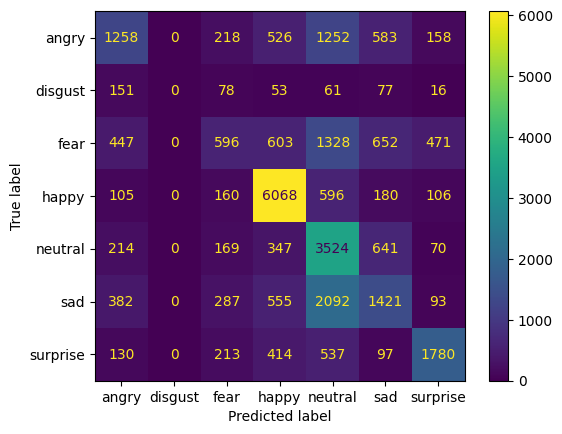

In [24]:
plot_confusion_matrix(clfsP, X_train,Y_train)  
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


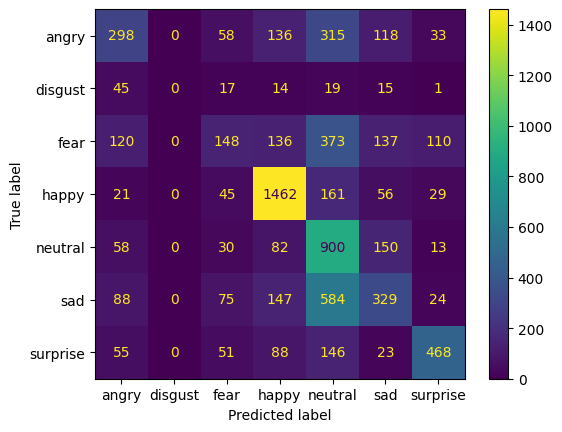

In [25]:
plot_confusion_matrix(clfsP, X_test,Y_test)  
plt.show()

### Logistic 

In [23]:
from sklearn.linear_model import LogisticRegression
clfL1 = LogisticRegression(random_state=0).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
clfL1.score(X_train,Y_train)

0.5043714514612142

In [25]:
clfL1.score(X_test,Y_test)

0.5101699637782112

In [ ]:
# None penalty

In [28]:
from sklearn.linear_model import LogisticRegression
clfL2 = LogisticRegression(penalty='none',random_state=0).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
clfL2.score(X_train,Y_train)

0.5037444703751437

In [31]:
clfL2.score(X_test,Y_test)

0.5093340763443857

## Best 

In [104]:
from sklearn.linear_model import LogisticRegression
clfL3 = LogisticRegression(solver='newton-cg',random_state=0).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [27]:
clfL3.score(X_train,Y_train)

0.5572816886690585

In [28]:
clfL3.score(X_test,Y_test)

0.527027027027027

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


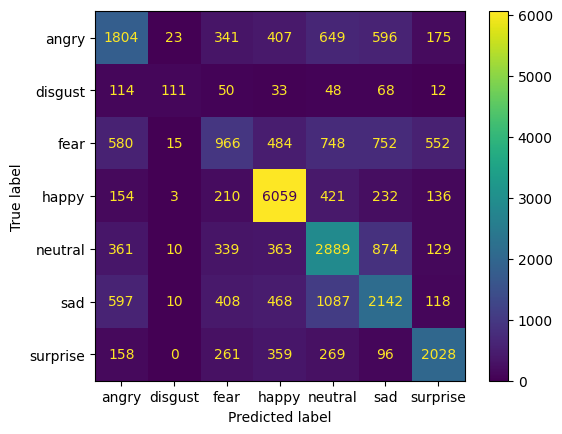

In [29]:
plot_confusion_matrix(clfL3, X_train,Y_train)  
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


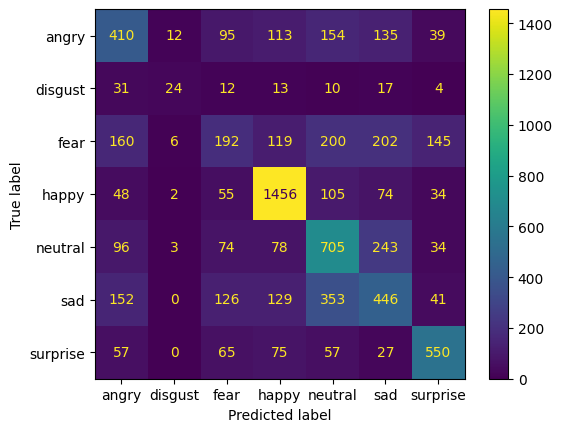

In [30]:
plot_confusion_matrix(clfL3, X_test,Y_test)  
plt.show()

In [36]:
clfL4 = LogisticRegression(solver='saga',random_state=0).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [37]:
clfL4.score(X_train,Y_train)

0.5136020063394754

In [38]:
clfL4.score(X_test,Y_test)

0.513792142658122

In [39]:
clfL5 = LogisticRegression(solver='sag',random_state=0).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [40]:
clfL5.score(X_train,Y_train)

0.523076387195653

In [41]:
clfL5.score(X_test,Y_test)

0.523265533574812

### KNN 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# 10 neighbors
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, Y_trainN)

KNeighborsClassifier(n_neighbors=10)

In [76]:
neigh.score(X_train,Y_trainN)

0.6355149952976419

In [78]:
neigh.score(X_test,Y_testN)

0.4419058233491223

In [79]:
# 120 neighbors
neigh1 = KNeighborsClassifier(n_neighbors=20)
neigh1.fit(X_train, Y_trainN)

KNeighborsClassifier(n_neighbors=20)

In [80]:
neigh1.score(X_train,Y_trainN)

0.5700999686509457

In [81]:
neigh1.score(X_test,Y_testN)

0.4442741710782948

### Best training result 

In [134]:
# 3 neighbors
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train, Y_trainN)

KNeighborsClassifier(n_neighbors=3)

In [35]:
neigh2.score(X_train,Y_trainN)

0.8312375909993381

In [36]:
neigh2.score(X_test,Y_testN)

0.4506826414042909

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


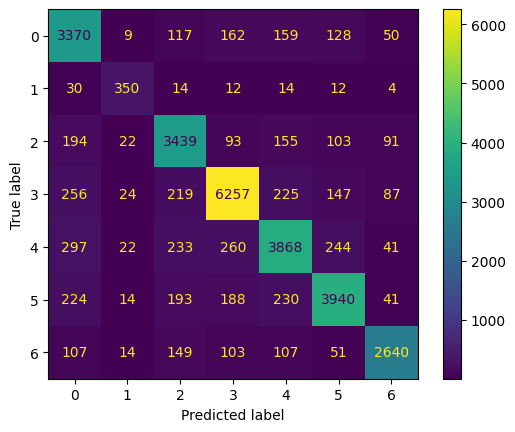

In [37]:
plot_confusion_matrix(neigh2, X_train,Y_trainN)  
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


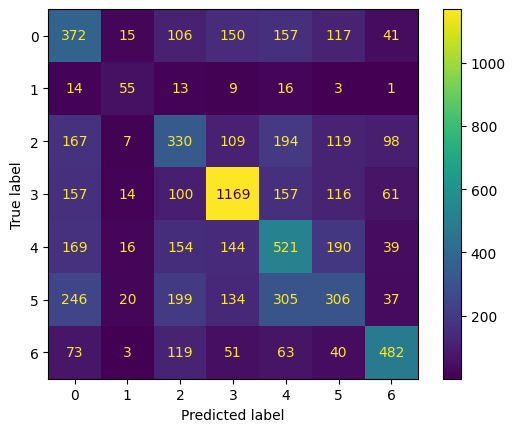

In [38]:
plot_confusion_matrix(neigh2, X_test,Y_testN)  
plt.show()

In [88]:
# 5 neighbors
neigh3 = KNeighborsClassifier(n_neighbors=5)
neigh3.fit(X_train, Y_trainN)

KNeighborsClassifier()

In [89]:
neigh3.score(X_train,Y_trainN)

0.7363196210247658

In [90]:
neigh3.score(X_test,Y_testN)

0.44413485650599055

## CNN

In [132]:
# Change labels to int
path = 'FER2013/train/'
files = os.listdir(path)  
num = len(files)  
num_catrgories = np.zeros(num)
labels = []
icategory = 0
# Gain name of categories and number of instances in each class
for file in os.listdir(path):
    # Get folders of each categories
    subfolder = os.path.join(path, file)
    files = os.listdir(subfolder)  
    num_catrgories[icategory] = len(files)
    labels.append(file)
    icategory += 1
num_catrgories = num_catrgories.astype(int)

Y_trainN = []
classnum = 0
for label in labels:
    for num_instances in range(0,num_catrgories[classnum]):
        Y_trainN.append(labels.index(label))
    classnum += 1

In [133]:
path = 'FER2013/test/'
files = os.listdir(path)  
num = len(files)  
num_catrgories = np.zeros(num)
labels = []
icategory = 0
# Gain name of categories and number of instances in each class
for file in os.listdir(path):
    # Get folders of each categories
    subfolder = os.path.join(path, file)
    files = os.listdir(subfolder)  
    num_catrgories[icategory] = len(files)
    labels.append(file)
    icategory += 1
num_catrgories = num_catrgories.astype(int)

Y_testN = []
classnum = 0
for label in labels:
    for num_instances in range(0,num_catrgories[classnum]):
        Y_testN.append(labels.index(label))
    classnum += 1

In [65]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.regularizers import l2

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

IndexError: tuple index out of range

In [67]:
X_train.shape[0]

28709

### Find most similar face 

In [58]:
from deepface import DeepFace

In [54]:
# Target image
img_Target = cv2.imread('FER2013/test/neutral/PrivateTest_10086748.jpg')
cv2.imshow('Target Image',img_Target)
cv2.waitKey()

-1

In [55]:
path_s = 'FER2013/train/angry/'
files = os.listdir(path_s)  
num_s = len(files)  

In [56]:
similarities = np.zeros(num_s)

### Problem: FER2013 Can not detect face 

In [59]:
i_image = 0
for image in files:
    compare_img = os.path.join(path_s,image)
    result = DeepFace.verify(img_Target,compare_img,enforce_detection=False)
    similarities[i_image] = result['distance']
    i_image += 1

### Problem: nan value 
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

Future work: just compare similarity of the facial features

In [65]:
similarities_m = np.nan_to_num(similarities,nan=1)

In [72]:
similarities_min = np.nan_to_num(similarities,nan=0)

In [66]:
mostsimilar = np.argmin(similarities_m)

In [73]:
mostunsimilar = np.argmax(similarities_min)
files[mostunsimilar]

'Training_98565517.jpg'

In [67]:
# Most similar image
files[mostsimilar]

'Training_90926247.jpg'

In [68]:
DeepFace.verify(img_Target,'FER2013/train/angry/Training_90926247.jpg',enforce_detection=False)

{'verified': True,
 'distance': 0.18277765350630215,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [71]:
from PIL import Image
im = Image.open("FER2013/test/neutral/PrivateTest_10086748.jpg")
im = im.save("ImageP/targetImage.jpg")

In [77]:
DeepFace.verify(img_Target,'FER2013/train/angry/Training_98565517.jpg',enforce_detection=False)

{'verified': False,
 'distance': 1.0328192355488162,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [78]:
im = Image.open("FER2013/train/angry/Training_98565517.jpg")
im = im.save("ImageP/mostunsimilarImage.jpg")

### Eye cut

In [106]:
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [107]:
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [108]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))
def draw_eye(p1,p2,input_img):
    center_coordinates = (int((p1[0]+p2[0])/2), int((p1[1]+p2[1])/2))
  
    axesLength = (int(cv2.norm(p1,p2)*1.2), int(cv2.norm(p1,p2)*0.6))

    angle = angle_between(p1,p2)

    startAngle = 0

    endAngle = 360
    color = (255, 255, 255)
    thickness = -1

    input_img = cv2.ellipse(input_img, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness)

In [109]:
def eye_cut(path):
    detector_lm = dlib.get_frontal_face_detector()
    predictor_lm = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

    test_img = cv2.imread(path)	
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    #cv2_imshow(gray_img)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    rects = detector_lm(gray_img, 1)
    for rect in rects:
        test_img2 = test_img.copy()
        test_img3 = test_img.copy()
        x = rect.tl_corner().x
        y = rect.tl_corner().y
        w = rect.width()
        h = rect.height()
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=3)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255
        '''
        predictions = model.predict(img_pixels)

          # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        '''

        shape = predictor_lm(gray_img, rect)
        shape_np = np.zeros((68, 2), dtype="int")
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)
        shape = shape_np

            # Display the landmarks
        for i, (x, y) in enumerate(shape):
            # Draw the circle to mark the keypoint 
            cv2.circle(test_img, (x, y), 1, (0, 0, 255), -1)
        eyel_l = shape[36]
        eyel_r = shape[39]
        eyer_l = shape[42]
        eyer_r = shape[45]
        mask_le = np.zeros(test_img2.shape, dtype=np.uint8)
        mask_re = np.zeros(test_img2.shape, dtype=np.uint8)
        draw_eye(eyel_l,eyel_r,mask_le)
        draw_eye(eyer_l,eyer_r,mask_re)
    # Displaying the image
        eyel_l1 = eyel_l
        eyel_r1 = eyel_r
        eyer_l1 = eyer_l
        eyer_r1 = eyer_r
        masked_image = cv2.bitwise_and(test_img2,mask_le)
        #cv2.imshow('masked_image',masked_image)
        masked_image2 = cv2.bitwise_and(test_img2,mask_re)
        #cv2.imshow('masked_image2',masked_image2)  

        dst = cv2.addWeighted(masked_image, 0.5, masked_image2, 0.5, 0)
        #cv2.imshow('dst',dst)  
        #cv2.waitKey()
        #cv2.destroyAllWindows()
      #resized_img = cv2.resize(test_img, (400, 400))

      #cv2_imshow(resized_img)
    return (eyel_l1,eyel_r1,eyer_l1,eyer_r1,masked_image,masked_image2)

### Eye replacement 

In [110]:
detector_lm = dlib.get_frontal_face_detector()
predictor_lm = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [111]:
def eye_replace(path1,path2):
    test_img = cv2.imread(path1)	
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    #cv2.imshow(test_img)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    eyel_l1,eyel_r1,eyer_l1,eyer_r1,masked_image,masked_image2 = eye_cut(path2)

    rects = detector_lm(gray_img, 1)
    for rect in rects:
        test_img2 = test_img.copy()
        x = rect.tl_corner().x
        y = rect.tl_corner().y
        w = rect.width()
        h = rect.height()
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=3)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255
        '''
        predictions = model.predict(img_pixels)

          # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        '''

        shape = predictor_lm(gray_img, rect)
        
        shape_np = np.zeros((68, 2), dtype="int")
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)
        shape = shape_np

        # Display the landmarks
        for i, (x, y) in enumerate(shape):
            # Draw the circle to mark the keypoint 
            cv2.circle(test_img, (x, y), 1, (0, 0, 255), -1)
        eyel_l = shape[36]
        eyel_r = shape[39]
        eyer_l = shape[42]
        eyer_r = shape[45]

        el_scaling = (cv2.norm(eyel_l,eyel_r) / cv2.norm(eyel_l1,eyel_r1))
        print(el_scaling)

        masked_imagel = masked_image.copy() 
        print(masked_image.shape[1]/test_img.shape[1])
        print(eyel_l[0]/test_img.shape[1])
        print(eyel_l1[0]/masked_image.shape[1])
        print(eyel_r[0]/test_img.shape[1])
        print(eyel_r1[0]/masked_image.shape[1])

        width = int(masked_imagel.shape[1] * el_scaling)
        height = int(masked_imagel.shape[0] * el_scaling)
        dim = (width, height)

    # resize image
        masked_imagel = cv2.resize(masked_imagel, dim, interpolation = cv2.INTER_AREA)

        mat_notrans=np.float32([[1,0,(eyel_l[0]-eyel_l1[0]*(el_scaling)+eyel_r[0]-eyel_r1[0]*(el_scaling))/2],[0,1,(eyel_l[1]-eyel_l1[1]*(el_scaling)+eyel_r[1]-eyel_r1[1]*(el_scaling))/2]])

        masked_imagel=cv2.warpAffine(masked_imagel,mat_notrans,(test_img.shape[1],test_img.shape[0]))

        print(masked_imagel.shape)
        #cv2_imshow(masked_imagel)

        gray_eyel = cv2.cvtColor(masked_imagel, cv2.COLOR_BGR2GRAY)
        # make mask by thresholding sky image, antialias, convert to float in range 0 to 1 and make 3 channels
        mask_eyel = cv2.threshold(gray_eyel, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        mask_eyel = cv2.GaussianBlur(mask_eyel, (0,0), 2, 2)
        mask_eyel[mask_eyel<128] = 0
        mask_eyel = mask_eyel.astype(np.float32)/255
        mask_eyel = cv2.merge([mask_eyel,mask_eyel,mask_eyel])

    # blend and convert back to 8-bit result
        result = test_img2 * (1 - mask_eyel) + masked_imagel * mask_eyel
        result = result.clip(0,255).astype(np.uint8)  
        #cv2_imshow(result)



        er_scaling = (cv2.norm(eyer_l,eyer_r) / cv2.norm(eyer_l1,eyer_r1))
        print(er_scaling)

        masked_imager = masked_image2.copy() 
        print(masked_image2.shape[1]/test_img.shape[1])
        print(eyer_l[0]/test_img.shape[1])
        print(eyer_l1[0]/masked_image2.shape[1])
        print(eyer_r[0]/test_img.shape[1])
        print(eyer_r1[0]/masked_image2.shape[1])

        width = int(masked_imager.shape[1] * er_scaling)
        height = int(masked_imager.shape[0] * er_scaling)
        dim = (width, height)

    # resize image
        masked_imager = cv2.resize(masked_imager, dim, interpolation = cv2.INTER_AREA)

        mat_notrans=np.float32([[1,0,(eyer_l[0]-eyer_l1[0]*(er_scaling)+eyer_r[0]-eyer_r1[0]*(er_scaling))/2],[0,1,(eyer_l[1]-eyer_l1[1]*(er_scaling)+eyer_r[1]-eyer_r1[1]*(er_scaling))/2]])

        masked_imager=cv2.warpAffine(masked_imager,mat_notrans,(test_img.shape[1],test_img.shape[0]))

        print(masked_imager.shape)
        #cv2_imshow(masked_imager)

        gray_eyer = cv2.cvtColor(masked_imager, cv2.COLOR_BGR2GRAY)
        # make mask by thresholding sky image, antialias, convert to float in range 0 to 1 and make 3 channels
        mask_eyer = cv2.threshold(gray_eyer, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        mask_eyer = cv2.GaussianBlur(mask_eyer, (0,0), 2, 2)
        mask_eyer[mask_eyer<128] = 0
        mask_eyer = mask_eyer.astype(np.float32)/255
        mask_eyer = cv2.merge([mask_eyer,mask_eyer,mask_eyer])

    # blend and convert back to 8-bit result
        result = result * (1 - mask_eyer) + masked_imager * mask_eyer
        result = result.clip(0,255).astype(np.uint8)  
        cv2.imshow('result',result)
        cv2.waitKey()
        return result

In [47]:
replacedface = eye_replace('test_hreso/test_hreso/sad/download (11).jpg','test_hreso/test_hreso/happy/images (2).jpg')

1.330440901618982
1.4170616113744077
0.3222748815165877
0.38127090301003347
0.4265402843601896
0.431438127090301
(208, 211, 3)
1.3617658132983805
1.4170616113744077
0.5876777251184834
0.5183946488294314
0.6919431279620853
0.568561872909699
(208, 211, 3)


In [48]:
cv2.imwrite('ImageP/replacedface.jpg',replacedface)

True

In [51]:
feature_replaced = getfeaturevector('ImageP/replacedface.jpg')

In [60]:
features_replaced = getfeature(feature_replaced)

In [73]:
replacedface = eye_replace('test_hreso/test_hreso/happy/images (2).jpg','test_hreso/test_hreso/sad/download (11).jpg')
cv2.imwrite('ImageP/replacedface1.jpg',replacedface)               

0.7516305299868064
0.705685618729097
0.38127090301003347
0.3222748815165877
0.431438127090301
0.4265402843601896
(168, 299, 3)
0.7343406555183414
0.705685618729097
0.5183946488294314
0.5876777251184834
0.568561872909699
0.6919431279620853
(168, 299, 3)


True

In [74]:
feature_replaced1 = getfeaturevector('ImageP/replacedface1.jpg')
features_replaced1 = getfeature(feature_replaced1)

In [75]:
x = np.zeros([2,272])
x[0] = features_replaced
x[1] = features_replaced1

In [76]:
clfL3.predict(x)

array(['disgust', 'happy'], dtype='<U8')

### Cut mouth 

In [18]:
import cv2
import dlib
import numpy as np

In [19]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
img = cv2.imread('Image/indoor_002.png')
mask = np.zeros(img.shape[0:2], dtype=np.uint8)
cv2.drawContours(mask, [shape], -1, (255, 255, 255), -1, cv2.LINE_AA)
res = cv2.bitwise_and(img,img,mask = mask)
rect = cv2.boundingRect(shape) # returns (x,y,w,h) of the rect
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
cv2.imshow("Mask",mask)
cv2.imshow("Cropped", cropped )
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('mouth2.jpg', cropped)

In [ ]:
# Import the library OpenCV
import cv2
  
# Import the image
file_name = "mouth2.jpg"
  
# Read the image
src = cv2.imread(file_name, 1)
  
# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  
# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  
# Using cv2.split() to split channels 
# of coloured image
b, g, r = cv2.split(src)
  
# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]
  
# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)
  
# Writing and saving to a new image
cv2.imwrite("gfg_white.png", dst)


In [ ]:
from PIL import Image, ImageDraw, ImageFilter

In [ ]:
im2 = cv2.imread('Image/indoor_005.png')
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    #extract mouth
    shape = shape[48:68]
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(im2, (x, y), 1, (0, 0, 255), -1)
		
    # Display the image
cv2.imshow('Landmark Detection', im2)
cv2.waitKey()

In [ ]:
mask_im = Image.new("L", im2.size, 0)
draw = ImageDraw.Draw(mask_im)
draw.polygon(shape, fill=255)
mask_im.show()
mask_im.save('mask_circle.jpg', quality=95)

In [ ]:
im2 = cv2.imread('Image/indoor_005.png')
mask = np.zeros(im2.shape,np.uint8)
mask=cv2.fillPoly(mask, pts = [shape], color =(0,255,0))
cv2.imwrite('workplace.png',mask)
plt.imshow(mask,cmap='gray')

In [ ]:
mask = cv2.imread('gfg_white.png')
mask = cv2.resize(mask, im2.shape[1::-1])
blendimg=cv2.addWeighted(im2, 1, mask, 0.2, 0)
plt.figure(figsize=(10,10))
cv2.imwrite('workplace_overlay_mask_opencv_addweighted.png',blendimg)
plt.imshow(blendimg)

In [ ]:
def overlay_image_alpha(img, img_overlay, x, y, alpha_mask):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """
    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    # Blend overlay within the determined ranges
    img_crop = img[y1:y2, x1:x2]
    img_overlay_crop = img_overlay[y1o:y2o, x1o:x2o]
    alpha = alpha_mask[y1o:y2o, x1o:x2o, np.newaxis]
    alpha_inv = 1.0 - alpha

    img_crop[:] = alpha * img_overlay_crop + alpha_inv * img_crop

In [ ]:
# Prepare inputs
x, y = 50, 0
img = np.array(Image.open("gfg_white.png"))
img_overlay_rgba = np.array(Image.open("Image/indoor_005.png"))
img_overlay_rgba = cv2.cvtColor(img_overlay_rgba, cv2.COLOR_RGB2RGBA).copy()
# Perform blending
alpha_mask = img_overlay_rgba[:, :, 3] / 255.0
img_result = img[:, :, :3].copy()
img_overlay = img_overlay_rgba[:, :, :3]
overlay_image_alpha(img_result, img_overlay, x, y, alpha_mask)

# Save result
Image.fromarray(img_result).save("img_result.jpg")

In [ ]:
s_img = cv2.imread("gfg_white.png")
l_img = cv2.imread("Image/indoor_005.png")
x_offset = 230
y_offset = 314
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
cv2.imshow("limage",l_img)
cv2.waitKey()

### Use test_hreso images

In [44]:
img1 = cv2.imread('test_hreso/test_hreso/angry/images (7).jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    #extract mouth
    shape = shape[48:60]
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(img1, (x, y), 1, (0, 0, 255), -1)
		
    # Display the image
cv2.imshow('Landmark Detection', img1)
cv2.waitKey()
cv2.imwrite('ImageP/mouth_show.jpg', img1)

True

In [45]:
img1 = cv2.imread('test_hreso/test_hreso/angry/images (7).jpg')
mask = np.zeros(img1.shape[0:2], dtype=np.uint8)
cv2.drawContours(mask, [shape], -1, (255, 255, 255), -1, cv2.LINE_AA)
res = cv2.bitwise_and(img1,img1,mask = mask)
rect = cv2.boundingRect(shape) # returns (x,y,w,h) of the rect
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
cv2.imshow("Mask",mask)
cv2.imshow("Cropped", cropped )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
cv2.imwrite('ImageP/crop_mouth.jpg', cropped)

True

In [ ]:
# Import the library OpenCV
import cv2
  
# Import the image
file_name = "ImageP/mouth2.jpg"
  
# Read the image
src = cv2.imread(file_name, 1)
  
# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  
# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  
# Using cv2.split() to split channels 
# of coloured image
b, g, r = cv2.split(src)
  
# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]
  
# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)
  
# Writing and saving to a new image
cv2.imwrite("ImageP/mouth2M.png", dst)

In [76]:
img2 = cv2.imread('test_hreso/test_hreso/happy/images (2).jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    #extract mouth
    shape = shape[48:60]
    # Get center
    center = np.mean(shape,axis=0,dtype="int")
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(img2, (x, y), 1, (0, 0, 255), -1)
		
    # Display the image
cv2.imshow('Landmark Detection', img2)
cv2.waitKey()

-1

In [71]:
cv2.imwrite('ImageP/DstImage.jpg',img2)

True

In [49]:

img1 = cv2.imread('test_hreso/test_hreso/happy/images (2).jpg')
mask = np.zeros(img1.shape[0:2], dtype=np.uint8)
cv2.drawContours(mask, [shape], -1, (255, 255, 255), -1, cv2.LINE_AA)
res = cv2.bitwise_and(img1,img1,mask = mask)
rect = cv2.boundingRect(shape) # returns (x,y,w,h) of the rect
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
cv2.imshow("Mask",mask)
cv2.imshow("Cropped", cropped )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
cv2.imwrite('ImageP/crop_Tmouth.jpg', cropped)

True

In [ ]:
cv2.imwrite('ImageP/mouth_Target.jpg', cropped)
# Import the image
file_name = "ImageP/mouth_Target.jpg"
  
# Read the image
src = cv2.imread(file_name, 1)
  
# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  
# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  
# Using cv2.split() to split channels 
# of coloured image
b, g, r = cv2.split(src)
  
# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]
  
# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)
  
# Writing and saving to a new image
cv2.imwrite("ImageP/mouth1M.png", dst)

In [ ]:
mouth = cv2.imread('ImageP/mouth2M.png')
moutht = cv2.imread('ImageP/mouth1M.png')

In [51]:
mouth = cv2.imread('ImageP/crop_mouth.jpg')
moutht = cv2.imread('ImageP/crop_Tmouth.jpg')

In [52]:
# Resize
mouth_cut = cv2.resize(mouth, moutht.shape[1::-1])
cv2.imwrite('ImageP/mouthCut.png',mouth_cut)

True

In [ ]:
l_img1 = cv2.imread("test_hreso/test_hreso/happy/images (2).jpg")
s_img1 = cv2.imread('ImageP/cutTrans.png')
x_offset =134
y_offset = 71
l_img1[y_offset:y_offset+s_img1.shape[0], x_offset:x_offset+s_img1.shape[1]] = s_img1
cv2.imshow("limage",l_img1)
cv2.waitKey()

In [ ]:
im_a = Image.open('ImageP/mouthCut.png').convert('L')
s_img = Image.open('ImageP/mouthCut.png')
im_rgba = s_img.copy()
im_rgba.putalpha(im_a)
im_rgba.save('ImageP/cutTrans.png')

In [ ]:
l_img1 = cv2.imread("test_hreso/test_hreso/happy/images (2).jpg")
s_img = cv2.imread("ImageP/cutTrans.png", -1)

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * l_img[y1:y2, x1:x2, c])
cv2.imshow("limage",l_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
x, y = 134, 71
img = np.array(Image.open("test_hreso/test_hreso/happy/images (2).jpg"))
img_overlay_rgba = np.array(Image.open("ImageP/mouthCut.png"))
img_overlay_rgba = cv2.cvtColor(img_overlay_rgba, cv2.COLOR_RGB2RGBA).copy()
# Perform blending
alpha_mask = img_overlay_rgba[:, :, 3] / 255.0
img_result = img[:, :, :3].copy()
img_overlay = img_overlay_rgba[:, :, :3]
overlay_image_alpha(img_result, img_overlay, x, y, alpha_mask)

# Save result
Image.fromarray(img_result).save("img_result.jpg")

In [ ]:
src = cv2.imread("ImageP/cutTrans.png")
dst = cv2.imread("test_hreso/test_hreso/happy/images (2).jpg")

In [ ]:
mask = np.zeros(src.shape[0:2], dtype=np.uint8)
cv2.rectangle(mask, (0,25), (45, 0), 255, -1)
cv2.imshow("Rectangular Mask", mask)
cv2.waitKey()

In [ ]:
output = cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)
cv2.imwrite('ImageP/resultFace.png',output)

In [54]:
# New
src = cv2.imread("ImageP/mouthCut.png")
dst = cv2.imread("test_hreso/test_hreso/happy/images (2).jpg")

In [57]:
src.shape

(26, 46, 3)

In [58]:
mask = np.zeros(src.shape[0:2], dtype=np.uint8)
cv2.rectangle(mask, (0,25), (45, 0), 255, -1)
cv2.imshow("Rectangular Mask", mask)
cv2.waitKey()

-1

In [64]:
center

array([158,  83])

In [79]:
center = (158,86)

In [81]:
center = (156,88)

In [82]:
output = cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)
cv2.imwrite('ImageP/resultFace_adj.png',output)

True

In [144]:
# Landmark detection for output image
image = cv2.imread('replaced_eye.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
rects = detector(gray, 1)
    # Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
	# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np
    #extract mouth
    #shape = shape[48:68]
    # Display the landmarks
    for i, (x, y) in enumerate(shape):
	# Draw the circle to mark the keypoint 
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
		
    # Display the image
cv2.imshow('Landmark Detection', image)
cv2.waitKey()


-1

### Replace eyes 

In [113]:
replacedface = eye_replace('ImageP/resultFace_adj.png','test_hreso/test_hreso/angry/images (7).jpg')

0.7905694150420948
1.0033444816053512
0.3779264214046823
0.39666666666666667
0.431438127090301
0.47
(168, 299, 3)
0.7516305299868064
1.0033444816053512
0.5183946488294314
0.5933333333333334
0.568561872909699
0.6666666666666666
(168, 299, 3)


In [114]:
cv2.imwrite('replaced_eyemouth.png',replacedface)

True

In [115]:
replacedface = eye_replace('test_hreso/test_hreso/happy/images (2).jpg','test_hreso/test_hreso/angry/images (7).jpg')

0.7493166285596934
1.0033444816053512
0.38127090301003347
0.39666666666666667
0.431438127090301
0.47
(168, 299, 3)
0.733583212660232
1.0033444816053512
0.5183946488294314
0.5933333333333334
0.568561872909699
0.6666666666666666
(168, 299, 3)


In [116]:
cv2.imwrite('replaced_eye.png',replacedface)

True

In [119]:
# Testing
feature_replacede = getfeaturevector('replaced_eye.png')
features_replaced1 = getfeature(feature_replacede)
feature_replacedem = getfeaturevector('replaced_eyemouth.png')
features_replaced2 = getfeature(feature_replacedem)
feature_nonre = getfeaturevector('test_hreso/test_hreso/happy/images (2).jpg')
features_replaced3 = getfeature(feature_nonre)

In [120]:
x = np.zeros([3,272])
x[0] = features_replaced1
x[1] = features_replaced2
x[2] = features_replaced3

In [130]:
clfL3.predict(x)

array(['happy', 'happy', 'happy'], dtype='<U8')

In [135]:
neigh2.predict(x)

array([1, 1, 1])

In [142]:
clfsP.predict(x)

array(['happy', 'happy', 'happy'], dtype='<U8')

### Turn to 300w 

In [31]:
import zipfile
with zipfile.ZipFile('300W.zip', 'r') as zip_ref:
    zip_ref.extractall('300W')

In [32]:
# Extract png file
import os
import shutil
path = '300W/300W/01_Indoor/'
path_list=os.listdir(path)
despath = '300WImage/'
for filename in path_list:
    if os.path.splitext(filename)[1] == '.png':
        shutil.copyfile(path+filename,despath+filename)


In [33]:
path = '300W/300W/02_Outdoor/'
path_list=os.listdir(path)
despath = '300WImage/'
for filename in path_list:
    if os.path.splitext(filename)[1] == '.png':
        shutil.copyfile(path+filename,despath+filename)
